In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import jaccard_score, confusion_matrix, classification_report, f1_score, accuracy_score

In [2]:
df_train = pd.read_csv('train_new.csv', index_col=0)
df_test = pd.read_csv('test_new.csv', index_col=0)

In [3]:
df_train.shape

(233154, 33)

<br>

Due to the size of the data and the lack of computing power on my machine I will take a random sample of 10000 records of this dataset.


This will help reduce the processing time when using models like SVM or KNN.

In [4]:
train = df_train.sample(10000)

<br>
<br>
Let's compare the distribution of LOAN_DEFAULT values in the original vs the random sample dataset

In [5]:
print(f'Random set: \n {train.LOAN_DEFAULT.value_counts(normalize=True)}, \n Original set: \n {df_train.LOAN_DEFAULT.value_counts(normalize=True)}')

Random set: 
 0    0.7854
1    0.2146
Name: LOAN_DEFAULT, dtype: float64, 
 Original set: 
 0    0.782929
1    0.217071
Name: LOAN_DEFAULT, dtype: float64


<br>


#### They are fairly close with only an 0.0027 point difference in the distribution in values of LOAN_DEFAULT, so the random set is a true representation of the large, original set.

___

# Preprocessing and normalizing the data

In [6]:
X = train.drop(['LOAN_DEFAULT'], axis=1).values
y = train['LOAN_DEFAULT'].values

In [7]:
X.shape

(10000, 32)

In [8]:
y.shape

(10000,)

In [9]:
X[:1]

array([[6.9817e+04, 9.4271e+04, 7.5310e+01, 1.6000e+01, 1.8473e+04,
        8.6000e+01, 1.4000e+01, 3.4600e+02, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.5000e+01,
        0.0000e+00, 1.0000e+00]])

In [10]:
X = StandardScaler().fit(X).transform(X.astype('float'))
X[:1]

array([[ 1.09258074,  0.8981101 ,  0.05929998, -0.82853615, -0.33982274,
         0.77155131,  1.47911241, -1.2337799 ,  0.43886882, -0.28268995,
        -0.41612275,  6.73025232, -0.04003204, -0.83879417, -0.46213367,
        -0.5430739 , -0.2845868 , -0.19407899, -0.20738033, -0.20607246,
        -0.04323345, -0.04541892, -0.04529211, -0.0688636 , -0.39343868,
        -0.25418034, -0.58814154, -0.5549045 , -0.28096106, -0.31918642,
        -0.86607592,  0.92091652]])



Although the original data was split to train and test sets, I discovered that the test data had not been labeled, which makes it difficult to measure the accuracy of the models.

To resolve, this I will split the train dataset with a 0.3 test size so that I can measure the accuracy.

The dataset called 'test' will be used for the actual prediction once the models have been built.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7000, 32) (3000, 32) (7000,) (3000,)


# 1st model: K-nearest neighbor


___
First, I will find the best value for k

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
Ks = range(1,10);
scores = []
for k in Ks:
    knn  = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
    yhat = knn.predict(X_test)
    scores.append(accuracy_score(y_test, yhat))

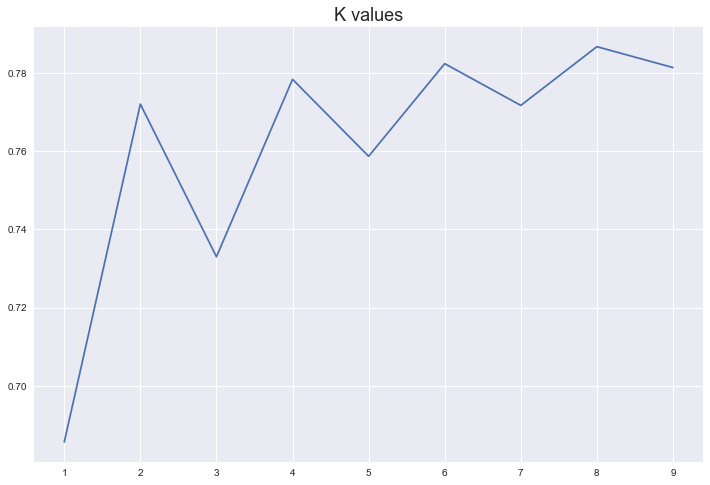

In [14]:
plt.figure(figsize=(12,8))
plt.plot(Ks, scores)
plt.title('K values', size=18)
plt.show()

Based on the chart the k value with the accuracy on this dataset is 8.

I will now run the model with this k value and save the predictions

In [15]:
knn  = KNeighborsClassifier(n_neighbors=8).fit(X_train,y_train)
KNNpred = knn.predict(X_test)
KNNpred

array([0, 0, 0, ..., 0, 0, 0])

In [16]:
jaccard_KNN = jaccard_score(y_test, KNNpred, average='weighted')
f1_KNN = f1_score(y_test, KNNpred, average='weighted')
accuracy_KNN = accuracy_score(y_test, KNNpred)
print(jaccard_KNN, f1_KNN, accuracy_KNN)

0.6299507553553276 0.7116450924689462 0.7866666666666666


___

# 2nd model: Support Vector Machine 


I first try the Radial Basis Function kernel and see its accuracy

In [17]:
from sklearn.svm import SVC

In [18]:
svm = SVC(kernel='rbf').fit(X_train, y_train)

In [19]:
SVMpred = svm.predict(X_test)
SVMpred

array([0, 0, 0, ..., 0, 0, 0])

In [20]:
jaccard_SVM = jaccard_score(y_test, SVMpred, average='weighted')
f1_SVM = f1_score(y_test, SVMpred, average='weighted')
accuracy_SVM = accuracy_score(y_test, SVMpred)
print(jaccard_SVM, f1_SVM, accuracy_SVM)

0.6299209736578859 0.7027043859657001 0.7936666666666666


---
I will now try different kernel functions and see which one produces the best results



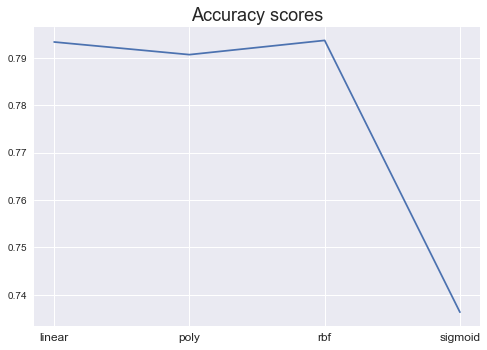

In [21]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
scores = []
for kernel in kernels:
    svm = SVC(kernel=kernel).fit(X_train, y_train)
    yhat = svm.predict(X_test)
    scores.append(accuracy_score(y_test, yhat))
    
plt.plot(kernels, scores)
plt.title('Accuracy scores', size=18)
plt.xticks(size=12)
plt.show()


It appears that the original model with Radial Basis Function produces the highest accuracy, along with the linear function.

Therefore, I will use the results of the the model I created above for the end report.

---
# 3rd model: Decision Tree

<br>

Let's first see what's the best value for max_depth

In [56]:
from sklearn.tree import DecisionTreeClassifier

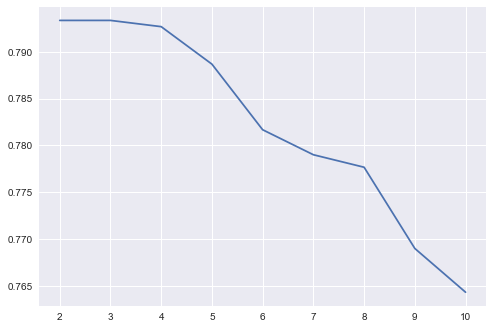

In [62]:
values = range(2,11)
scores = []
for value in values:
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=value).fit(X_train, y_train)
    yhat = tree.predict(X_test)
    scores.append(accuracy_score(y_test, yhat))
    
plt.plot(values, scores)
plt.show()

A value of 2 seems to produce the best result

In [63]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=2).fit(X_train, y_train)

In [64]:
TREEpred = tree.predict(X_test)

In [66]:
accuracy_TREE = accuracy_score(y_test, TREEpred)
jaccard_TREE = jaccard_score(y_test, TREEpred, average='weighted')
f1_TREE = f1_score(y_test, TREEpred, average='weighted')

---


# 4th model: Logistic Regression


<br>


I will use the liblinear solver with a regularization value of 0.01

In [69]:
from sklearn.linear_model import LogisticRegression

In [71]:
lr = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train.astype('int'))

In [72]:
LRpred = lr.predict(X_test)
LRpred[:5]

array([0, 0, 0, 0, 0])

In [84]:
accuracy_LR = accuracy_score(y_test, LRpred)
jaccard_LR = jaccard_score(y_test, LRpred, average='weighted')
f1_LR = f1_score(y_test, LRpred, average='weighted')

In [85]:
confusion_matrix(y_test,LRpred, labels=[0,1])

array([[2375,    5],
       [ 615,    5]])

In [86]:
print(classification_report(y_test, LRpred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      2380
           1       0.50      0.01      0.02       620

    accuracy                           0.79      3000
   macro avg       0.65      0.50      0.45      3000
weighted avg       0.73      0.79      0.71      3000



---

# Evaluation of all 4 models

In [87]:
model_scores = {
    'K-nearest neighbours':{'Jaccard index': jaccard_KNN, 'F1 score': f1_KNN, 'Accuracy score': accuracy_KNN},
    'Decision Tree':{'Jaccard index': jaccard_TREE, 'F1 score': f1_TREE, 'Accuracy score': accuracy_TREE},
    'Support Vector Machine':{'Jaccard index': jaccard_SVM, 'F1 score': f1_SVM, 'Accuracy score': accuracy_SVM},
    'Logistic Regression':{'Jaccard index': jaccard_LR, 'F1 score': f1_LR, 'Accuracy score': accuracy_LR}
}

In [88]:
report = pd.DataFrame(model_scores)
report

,K-nearest neighbours,Decision Tree,Support Vector Machine,Logistic Regression
Jaccard index,0.629951,0.629378,0.629921,0.630757
F1 score,0.711645,0.701908,0.702704,0.705018
Accuracy score,0.786667,0.793333,0.793667,0.793333


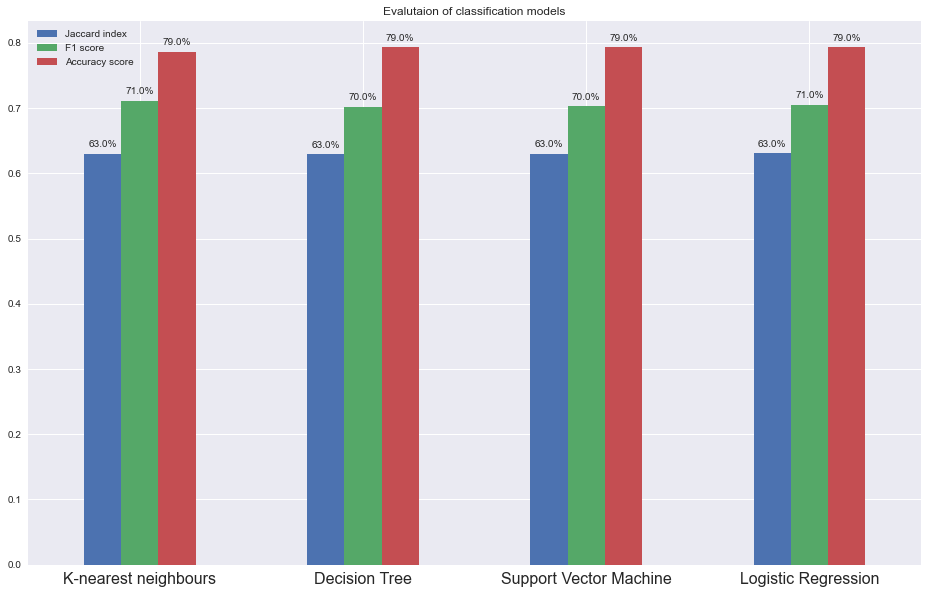

In [105]:
splt = report.T.plot(kind='bar', figsize=(16,10))
for p in splt.patches:
    splt.annotate(format(round(p.get_height(), 2) * 100)+"%",
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.xticks(rotation=0, size=16)
plt.title('Evalutaion of classification models')
plt.show()

# Summary